### Importing libraries

In [2]:
import numpy as np

The Simplest form of regression is 

$$y = x*w + b$$

Where,
* y = dependent variable
* b = constant
* w = slope
* x = independent variable

#### 1. `Understnading the loss function`

Here we are going to use the Mean Square Error loss function
$$
MSE = J(w, b) = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2
$$

The goal is to minimise MSE to find the optimal slope and intercept

#### 2. `Optimization Algorithm (Gradient Descent)`

Using gradient descent we iteratively calculate the gradients of the loss function with
respect to the parameters and keep on updating the parameters till we reach the local minima.

#### 3. `Steps to Implement Gradient Descent`

* Step 1: `Initialising Parameters`:
 
Initialise the slope = np.zeros(number of features) and intercept = 0

* Step 2: `Calculate the Partial Derivatives with recpect to parameters`:

$$\frac{\delta J}{\delta w} = \delta w = \frac{1}{N} \sum_{i=1}^{N} 2x_i(\hat{y} - y_i)$$

$$\frac{\delta J}{\delta b} = \delta b =\frac{1}{N} \sum_{i=1}^{N} 2(\hat{y} - y_i)$$

where,
$$y_{predicted} = \hat{y} = x_iw + b$$

* Step 3: `Updating the Parameters`

$$w = w - Lr * \delta w$$
$$b = b - Lr * \delta b$$

#### 4. `Implementing Linear Regression from Scratch in Python`

In [18]:
import numpy as np

class LinearRegression:
    def __init__(self, lr, n_iter):
        self.lr = lr
        self.n_iter = n_iter
        
    def fit(self, x, y):
        # m = number of training samples
        # n = number of features
        self.n_samples, self.n_features = x.shape
        self.x = x
        self.y = y  
        self.w = np.zeros(self.n_features)
        self.b = 0
         
        for i in range(self.n_iter):
            y_predicted = self.predict(self.x)
            
            # calculate gradients
            dw = (1/self.n_samples) * 2*np.dot(self.x.T, (y_predicted - self.y))
            db = (1/self.n_samples) * 2*np.sum(y_predicted - self.y)
            
            # Update weights
            self.w = self.w - self.lr * dw
            self.b = self.b - self.lr * db            
            
    def predict(self, x):
        return np.dot(self.x, self.w) + self.b 

#### Predicting using linear regression

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv("dataset.csv")
df["x1"]  = np.log(df.loc[:,"YearsExperience"])
x = df.loc[:,["YearsExperience", "x1"]].values
y = df.loc[:,"Salary"].values
      
# Model training
model = LinearRegression(n_iter= 1000, lr = 0.01 )
model.fit(x, y)
print(f"Slope: {np.round(model.w, 2)} and Intercept: {np.round(model.b, 2)}")      


Slope: [8664.52 4187.9 ] and Intercept: 23518.88


In [20]:
# Prediction on test set
y_pred = model.predict(x)
y_pred

array([ 33449.0040284 ,  35881.51370965,  38213.70964662,  43750.75328146,
        45882.8067648 ,  53104.89229637,  54113.32061471,  56116.50551215,
        56116.50551215,  61056.7733359 ,  63010.14406891,  63982.62453916,
        63982.62453916,  64952.4867545 ,  68808.14823757,  72630.58873463,
        74531.03113484,  76425.02813388,  82072.87388663,  83009.71245163,
        90465.49946474,  93245.65631613, 100624.40623312, 103379.85122855,
       107959.98850913, 110701.32094331, 115260.00927258, 116170.31407244,
       122530.22611732, 124343.66922664])

Text(0, 0.5, 'Salary')

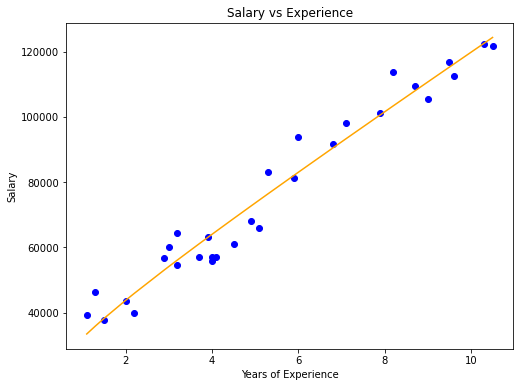

In [21]:
# Plotting fitted regression line for `YearsExperience``
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df["YearsExperience"], y, color = 'blue')
ax.plot(df["YearsExperience"], y_pred, color = 'orange')
ax.set_title('Salary vs Experience')
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary')
